# Task 1: Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms

## Importing the Libraries

In [1]:
# Importing neccessary libraries for the ML Project 
import pandas as pd   # For data loading and manipulation (e.g., CSV files, DataFrames)
import numpy as np    # For numerical operations, arrays, and mathematical functions

from sklearn.linear_model import LinearRegression # Linear Regression model for prediction
from sklearn.metrics import mean_squared_error, r2_score   # Evaluation metrics for model performance
from sklearn.model_selection import train_test_split    # For splitting dataset into training and testing sets

import matplotlib.pyplot as plt   # For visualizing results

## Loading the DataSets and Viewing(Inspecting) the data

In [2]:
# Loading the training and test datasets from CSV files
# 'train.csv' contains both the input features and the target variable
# 'test.csv' contains only the input features (used for prediction after model training)

train = pd.read_csv(r"train.csv")  # Load training data
test = pd.read_csv(r"test.csv")    # Load test data

In [3]:
train.shape       #Inspecting the Shape of the DataSet

(1460, 81)

In [4]:
train.info()    #Inspecting the column names, data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.columns.tolist()    #Viewing all the column names 

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [6]:
# Displaying the first 10 rows of selected columns for initial inspection
# Helps in understanding the relationship between floor area, bedrooms, bathrooms, and sale price

train[['Id','1stFlrSF','2ndFlrSF','GrLivArea','BedroomAbvGr','FullBath','SalePrice']].head(10)

,Id,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1,856,854,1710,3,2,208500
1,2,1262,0,1262,3,2,181500
2,3,920,866,1786,3,2,223500
3,4,961,756,1717,3,1,140000
4,5,1145,1053,2198,4,2,250000
5,6,796,566,1362,1,1,143000
6,7,1694,0,1694,3,2,307000
7,8,1107,983,2090,3,2,200000
8,9,1022,752,1774,2,2,129900
9,10,1077,0,1077,2,1,118000


## Feature Selection and Data Cleaning

In [7]:
#Removing the duplicate rows from the training data
train.drop_duplicates(inplace = True)  

In [8]:
#Selecting the features that I will be using to predict the target that is, Sale Price

features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']  #Variables which have to take for the Sale Price Prediction
target = 'SalePrice'   #Variable we have to predict

In [9]:
# Creating cleaned versions of train and test datasets for modeling
# Not a necessary step for our data because there are no missing values in our
# data, but filling missing values with the median is a good practice in general 
# as it helps handle incomplete data robustly without losing samples or biasing the dataset.

train_clean = train[features + [target]].dropna()
test_clean = test[features].fillna(test[features].median())

In [10]:
# Removing outliers in 'GrLivArea' feature by keeping only houses with living area <= 4000 sqft
# Outliers can skew the model’s learning and negatively impact prediction accuracy
# The outliers for this data is 4000 but for different data it can change accordingly 

train_clean = train_clean[train_clean['GrLivArea'] <= 4000]

Text(0, 0.5, 'Sale Price')

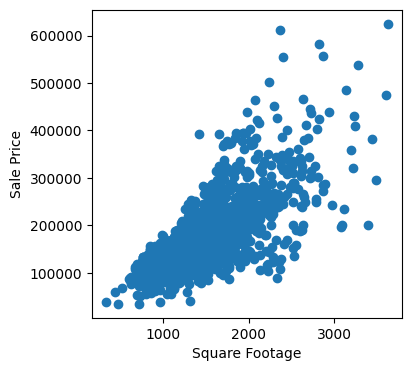

In [11]:
# Visualizing the relationship between living area ('GrLivArea') and sale price
# Scatter plot helps to see how house size affects price and identify any patterns or outliers

plt.figure(figsize=(4, 4))
plt.scatter(train_clean['GrLivArea'], train_clean[target])
plt.xlabel('Square Footage')
plt.ylabel('Sale Price')

Text(0.5, 0, 'Bedrooms')

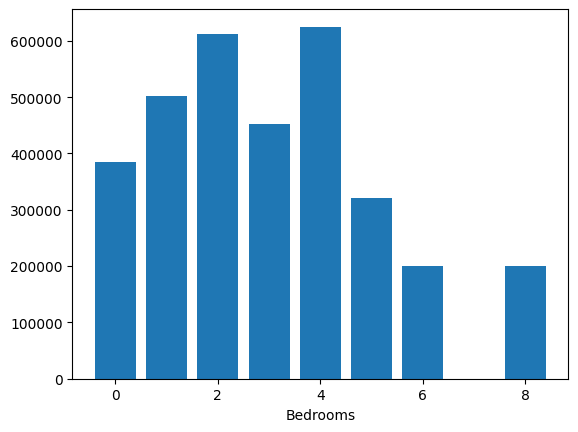

In [12]:
# Plotting a bar chart to visualize the relationship between number of bedrooms ('BedroomAbvGr') and sale price
# This helps to observe how the sale price varies with different bedroom counts

plt.bar(train_clean['BedroomAbvGr'], train_clean[target])
plt.xlabel('Bedrooms')

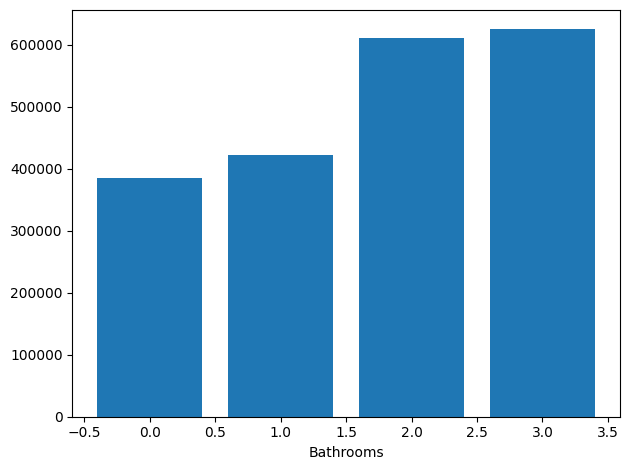

In [13]:
# Visualizing how the number of full bathroomsrelates to sale price using a bar chart
# Helps to observe trends or patterns in price with varying bathroom counts

plt.bar(train_clean['FullBath'], train_clean[target])
plt.xlabel('Bathrooms')
plt.tight_layout()
plt.show()

## Train-Test Split

In [14]:
# Preparing feature matrix X and target vector y for modeling
X = train_clean[features]
y = train_clean[target]

# Splitting the dataset into training and validation sets
# 80% of data for training the model, 20% for evaluating its performance
# random_state ensures reproducibility of the split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model Training (Simple Linear Regression)

In [15]:
#Intializing the Linear Regression Model
model = LinearRegression()

#Training the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Printing the learned coefficients for each feature and the intercept of the linear regression model
# Coefficients represent the weight or influence of each feature on the predicted sale price
# The intercept is the predicted sale price when all features are zero

print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


Model Coefficients:
GrLivArea: 126.97
BedroomAbvGr: -30484.34
FullBath: 21606.04
Intercept: 42874.17


## Model Evaluation

In [17]:
# Predicting sale prices for the validation set using the trained model
y_pred = model.predict(X_val)

# Calculating evaluation metrics to measure model performance on unseen data:
# RMSE (Root Mean Squared Error) shows the average prediction error magnitude in the original units (dollars)
# R² Score (coefficient of determination) indicates the proportion of variance in sale price explained by the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print(f"\nValidation RMSE: ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")


Validation RMSE: $47,457.07
R² Score: 0.5709


In [18]:
mean_price = train['SalePrice'].mean()

percent_error = (rmse / mean_price) * 100  # This should be a scalar
print(f"RMSE is {percent_error:.2f}% of the average house price")

RMSE is 26.23% of the average house price


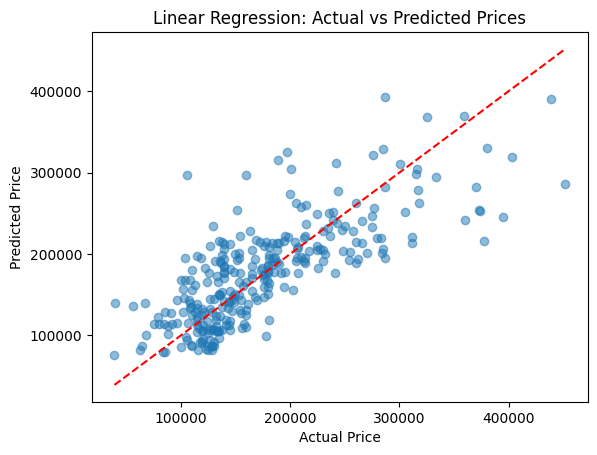

In [19]:
# Plotting Actual vs Predicted sale prices to visually assess model performance
# Each point represents a prediction — the closer it lies to the red dashed line (perfect prediction), the better the model
# This plot helps to identify if the model consistently under- or over-predicts in certain ranges

plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.show()

## Making Prediction on Test Data

In [20]:
# Predicting sale prices on the test dataset using the trained model
test_pred = model.predict(test_clean[features])

# Ensure no negative predictions
test_pred = np.maximum(test_pred, 0)

# Save submission by creating a DataFrame for submission with 'Id' and predicted 'SalePrice'
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': test_pred
})

In [21]:
# Saving the final predictions to a CSV file named 'output.csv'
# The file contains 'Id' and predicted 'SalePrice' columns, ready for submission or further analysis

submission.to_csv(r"output.csv", index=False)

In [22]:
# Displaying the first 10 rows of the submission DataFrame to verify output format and predicted values
submission.head(10)

,Id,SalePrice
0,1461,117279.272731
1,1462,141774.208315
2,1463,201472.132222
3,1464,198297.808905
4,1465,187642.922985
5,1466,204773.428472
6,1467,145350.095971
7,1468,180648.571260
8,1469,173782.227780
9,1470,115501.651673


## Conclusion

#### In this project, I have implemented a Linear Regression model to predict house sale price using the selected features such as GrLivArea, BedroomAbvGr, and FullBath.
#### The model achieved a validation RMSE of approximately $47,000 which corresponds to around 26.23% of the average house price. The relatively high error indicates that:
#### 1.) The model is limited by the small number of features used
#### 2.) Linear Regression is not sufficient to capture the complex, non-linear relationship in real estate data
#### Future Improvements can include:
#### 1.) Add more informative or impactful features, such as OverallQual, GarageArea, YearBuilt, etc.
#### 2.) Use more advanced models like Random Forest or Gradient Boosting to better capture nonlinear patterns.
#### 3.) Hyperparamater tuning and cross validation may provide to enhance robustness and generalization.